 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Nicholas Pamboukis
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_csvpath = Path("../Starter_Code/Resources/whale_returns.csv")
whale_csvdata = pd.read_csv(whale_csvpath)

# Set index for Date *be able to concat w other portfolios later*
whale_csvdata.set_index(pd.to_datetime(whale_csvdata['Date'], infer_datetime_format=True), inplace=True)
whale_csvdata.drop(columns=['Date'], inplace=True)


In [3]:
# Count nulls
whale_csvdata.isnull().sum()


SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_csvdata = whale_csvdata.dropna()

# Validate the nulls have been dropped -
whale_csvdata.isnull().sum()


SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_csvpath = Path("../Starter_Code/Resources/algo_returns.csv")
algo_csvdata = pd.read_csv(algo_csvpath)

# Set index for Date *be able to concat w other portfolios later*
algo_csvdata.set_index(pd.to_datetime(algo_csvdata['Date'], infer_datetime_format=True), inplace=True)
algo_csvdata.drop(columns=['Date'], inplace=True)


In [6]:
# Count nulls
algo_csvdata.isnull().sum()


Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algo_csvdata = algo_csvdata.dropna()

# Validate the nulls have been dropped -
algo_csvdata.isnull().sum()


Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
sp500_csvpath = Path("../Starter_Code/Resources/sp500_history.csv")
sp500_csvdata = pd.read_csv(sp500_csvpath)
# Set index for Date *be able to concat w other portfolios later*
sp500_csvdata.set_index(pd.to_datetime(sp500_csvdata['Date'], infer_datetime_format=True), inplace=True)
sp500_csvdata.drop(columns=['Date'], inplace=True)
sp500_csvdata.head()


,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [9]:
# Check Data Types
sp500_csvdata.dtypes

# The 'Close' column needs to strictly be numerical - currently a string


Close    object
dtype: object

In [10]:
# Fix Data Types - replace $
sp500_csvdata['Close'] = sp500_csvdata['Close'].str.replace("$", "", regex=True)

# Confirm the $ has been dropped
# sp500_csvdata['Close']

# Convert `Close` from `object` to `float`
sp500_csvdata['Close'] = sp500_csvdata['Close'].astype("float")

# Confirm data type ('Close') is now 'float'
sp500_csvdata.dtypes


Close    float64
dtype: object

In [11]:
# Calculate Daily Returns
sp500_daily_returns = sp500_csvdata.pct_change()
sp500_daily_returns = sp500_daily_returns.dropna()
sp500_daily_returns


,Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509
...,...
2012-10-05,0.003469
2012-10-04,0.000322
2012-10-03,-0.007123


In [12]:
# Drop nulls
sp500_daily_returns = sp500_daily_returns.dropna()

# Check if nulls have been dropped
sp500_daily_returns.isnull().sum()


Close    0
dtype: int64

In [13]:
# Rename `Close` Column to be specific to this portfolio.
sp500_col = ["S&P 500"]

# Assign column names to sp500_daily_returns variable only
sp500_daily_returns.columns = sp500_col

sp500_daily_returns.head()


,S&P 500
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


## Combine Whale, Algorithmic, and S&P 500 Returns

In [14]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
joined_portfolio_data = pd.concat([whale_csvdata, algo_csvdata, sp500_daily_returns], axis='columns', join='inner')
joined_portfolio_data.sort_index(ascending=True, inplace=True)
joined_portfolio_data.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Daily Returns'}, xlabel='Date'>

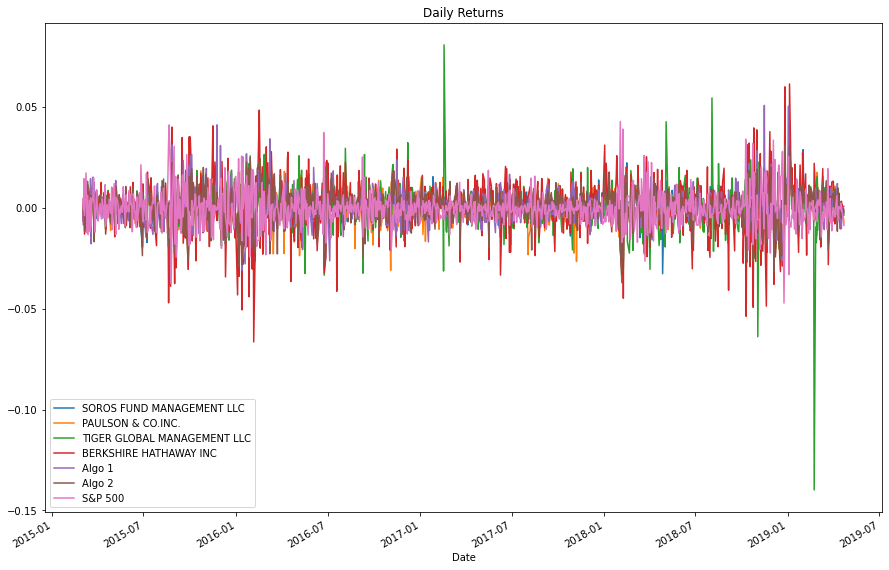

In [15]:
# Plot daily returns of all portfolios
joined_portfolio_data.plot(title="Daily Returns", figsize=(15,10))


#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Cumulative Returns per Portfolio'}, xlabel='Date'>

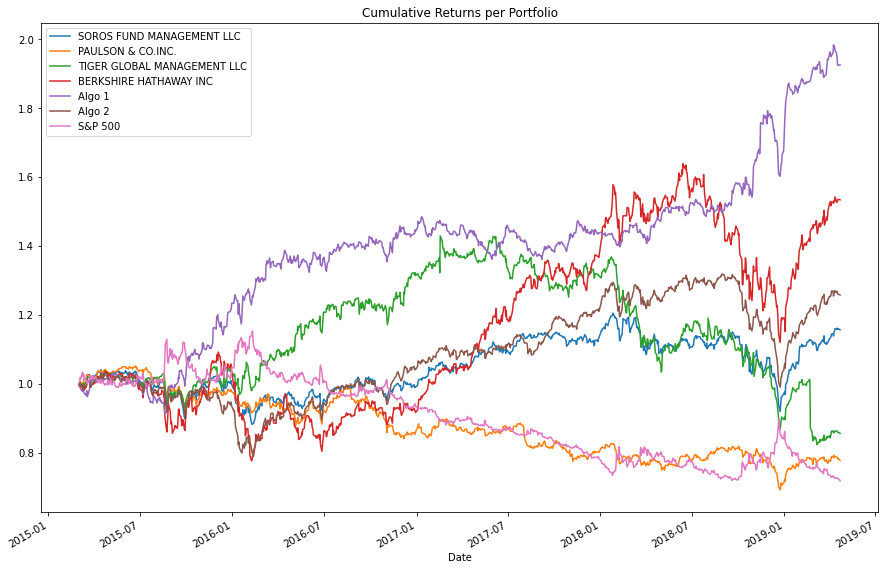

In [16]:
# Calculate cumulative returns of all portfolios
joined_portfolio_cumprod = (1 + joined_portfolio_data).cumprod()

# Plot cumulative returns
joined_portfolio_cumprod.plot(title="Cumulative Returns per Portfolio", figsize=(15,10))


---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


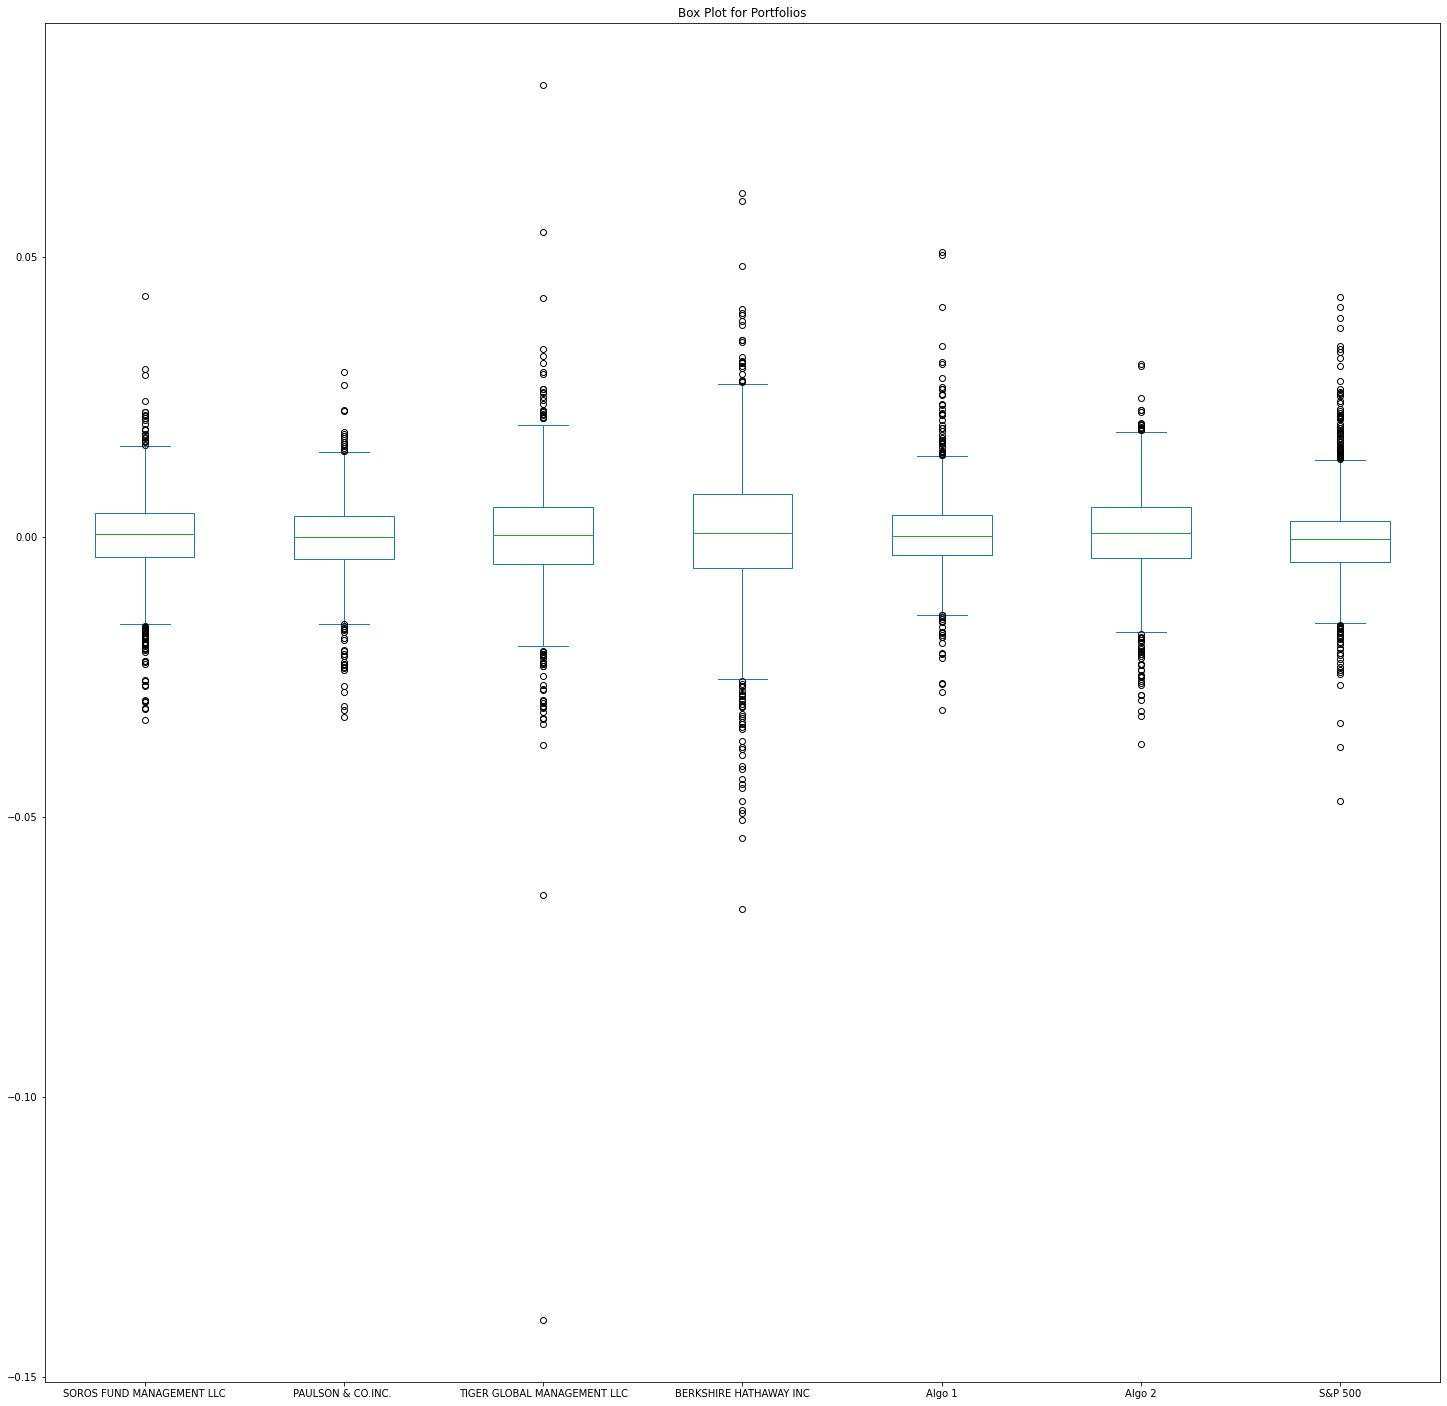

In [17]:
# Box plot to visually show risk
boxplot = joined_portfolio_data.plot.box(title="Box Plot for Portfolios", figsize=(25,25))


### Calculate Standard Deviations

In [18]:
# Calculate the daily standard deviations of all portfolios
joined_std = joined_portfolio_data.std()
joined_std = joined_std.sort_values(ascending=False)
joined_std


BERKSHIRE HATHAWAY INC         0.012919
TIGER GLOBAL MANAGEMENT LLC    0.010897
S&P 500                        0.008587
Algo 2                         0.008341
SOROS FUND MANAGEMENT LLC      0.007896
Algo 1                         0.007623
PAULSON & CO.INC.              0.007026
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [19]:
# Calculate  the daily standard deviation of S&P 500
sp500_std = float(joined_portfolio_data['S&P 500'].std())
print(f"S&P 500 Standard Deviation is: {round(sp500_std, 4)}\n")

# Determine which portfolios are riskier than the S&P 500
index = 0
portfolios_vs_sp500_df = joined_portfolio_data.drop(columns=['S&P 500'])
portfolios_vs_sp500_std = portfolios_vs_sp500_df.std()

print("Portfolio's that pose more risk than S&P 500: \n")
    
for i in range(len(portfolios_vs_sp500_std)):
    
    if sp500_std < float(portfolios_vs_sp500_std.iloc[index]):
        print(f" - {portfolios_vs_sp500_df.columns[index]}: {round(portfolios_vs_sp500_std[index], 4)}")

    index +=1
print("")


S&P 500 Standard Deviation is: 0.0086

Portfolio's that pose more risk than S&P 500: 

 - TIGER GLOBAL MANAGEMENT LLC: 0.0109
 - BERKSHIRE HATHAWAY INC: 0.0129



### Calculate the Annualized Standard Deviation

In [20]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = joined_std * np.sqrt(252)
annualized_std = annualized_std.sort_values(ascending=False)
annualized_std


BERKSHIRE HATHAWAY INC         0.205079
TIGER GLOBAL MANAGEMENT LLC    0.172989
S&P 500                        0.136313
Algo 2                         0.132413
SOROS FUND MANAGEMENT LLC      0.125348
Algo 1                         0.121006
PAULSON & CO.INC.              0.111527
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'21-Day Rolling Standard Deviation'}, xlabel='Date'>

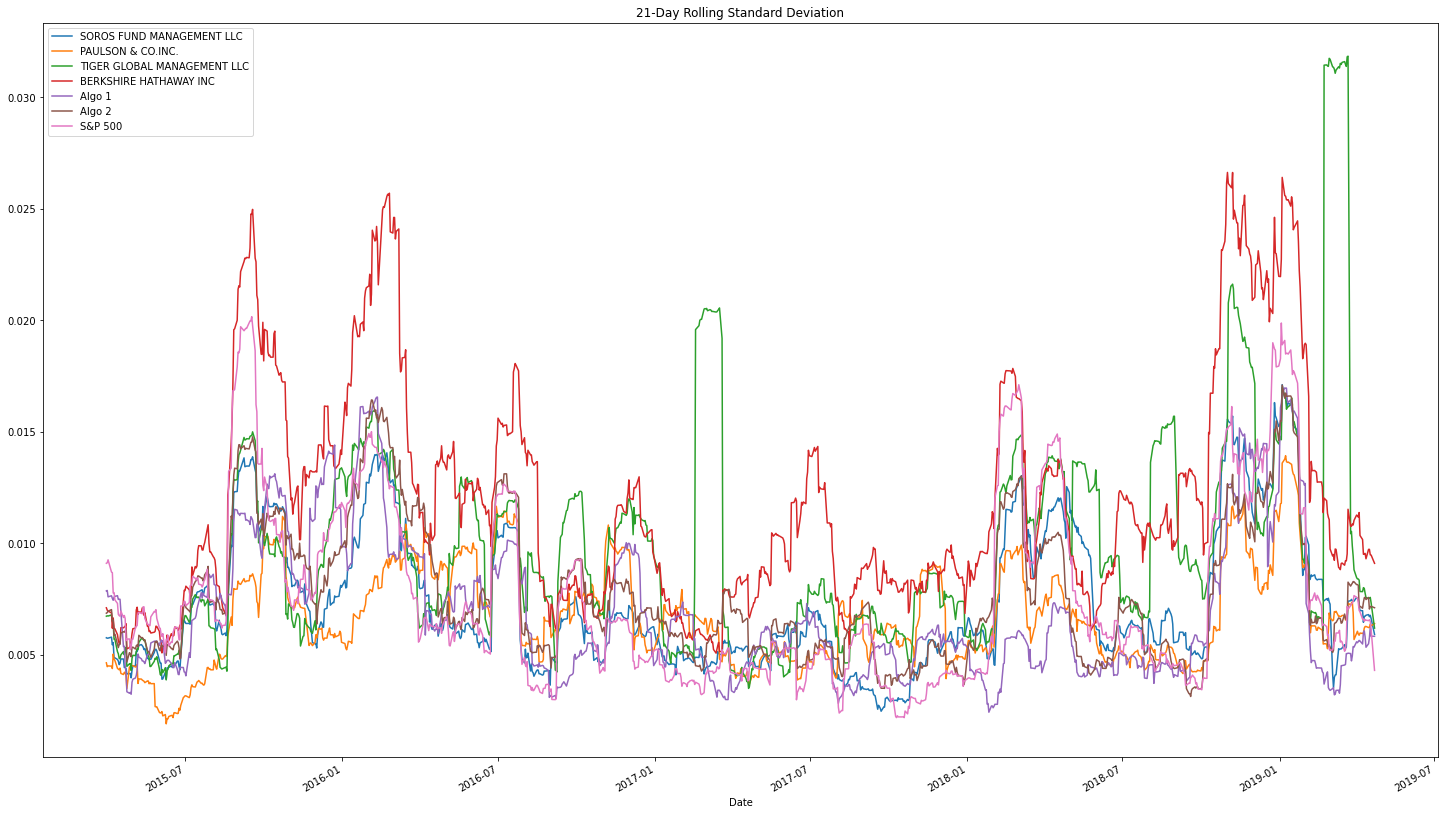

In [21]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_21 = joined_portfolio_data.rolling(window=21).std()
# Plot the rolling standard deviation
rolling_21.plot(title="21-Day Rolling Standard Deviation", figsize=(25,15))


### Calculate and plot the correlation

In [22]:
# Calculate the correlation
correlation = joined_portfolio_data.corr()

# Display de correlation matrix
correlation


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856
Algo 1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,-0.033963
Algo 2,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,-0.002192
S&P 500,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000


<AxesSubplot:>

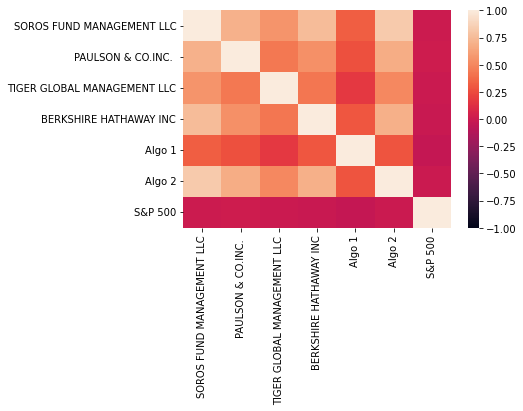

In [23]:
# Visiual for matrix above
sns.heatmap(correlation, vmin=-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

Berkshire Hathaway Covariance vs S&P 500: -1.5371091324717372e-06
Variance of S&P 500: 7.373467552840441e-05
Beta of Berkshire Hathaway: -0.020846489408902394


<AxesSubplot:title={'center':'Rolling 60-Day Beta of Berkshire Hathaway'}, xlabel='Date'>

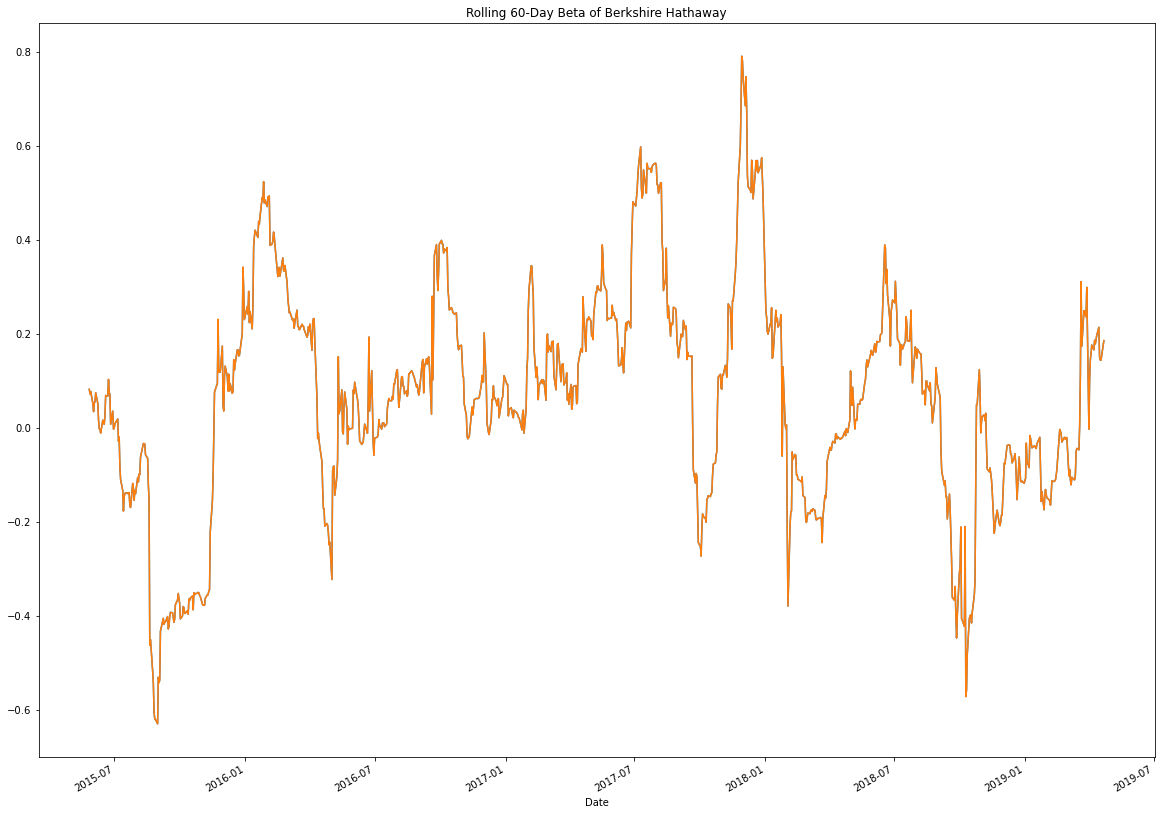

In [24]:
# Calculate covariance of a single portfolio
cov_berkshire = joined_portfolio_data['BERKSHIRE HATHAWAY INC'].cov(joined_portfolio_data['S&P 500'])
print(f"Berkshire Hathaway Covariance vs S&P 500: {cov_berkshire}")

# Calculate variance of S&P 500
var_sp500 = joined_portfolio_data['S&P 500'].var()
print(f"Variance of S&P 500: {var_sp500}")

# Computing beta
berkshire_beta = cov_berkshire / var_sp500
# berkshire_beta.plot()
print(f"Beta of Berkshire Hathaway: {berkshire_beta}")

# Plot beta trend
rolling_cov_berkshire = joined_portfolio_data['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(joined_portfolio_data['S&P 500'])
rolling_var_sp500 = joined_portfolio_data['S&P 500'].rolling(window=60).var()
rolling_beta_berkshire = rolling_cov_berkshire / rolling_var_sp500

ax = rolling_beta_berkshire.plot(title="Rolling 60-Day Beta of Berkshire Hathaway",figsize=(20,15))
rolling_beta_berkshire.plot(ax=ax)


## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

<AxesSubplot:xlabel='Date'>

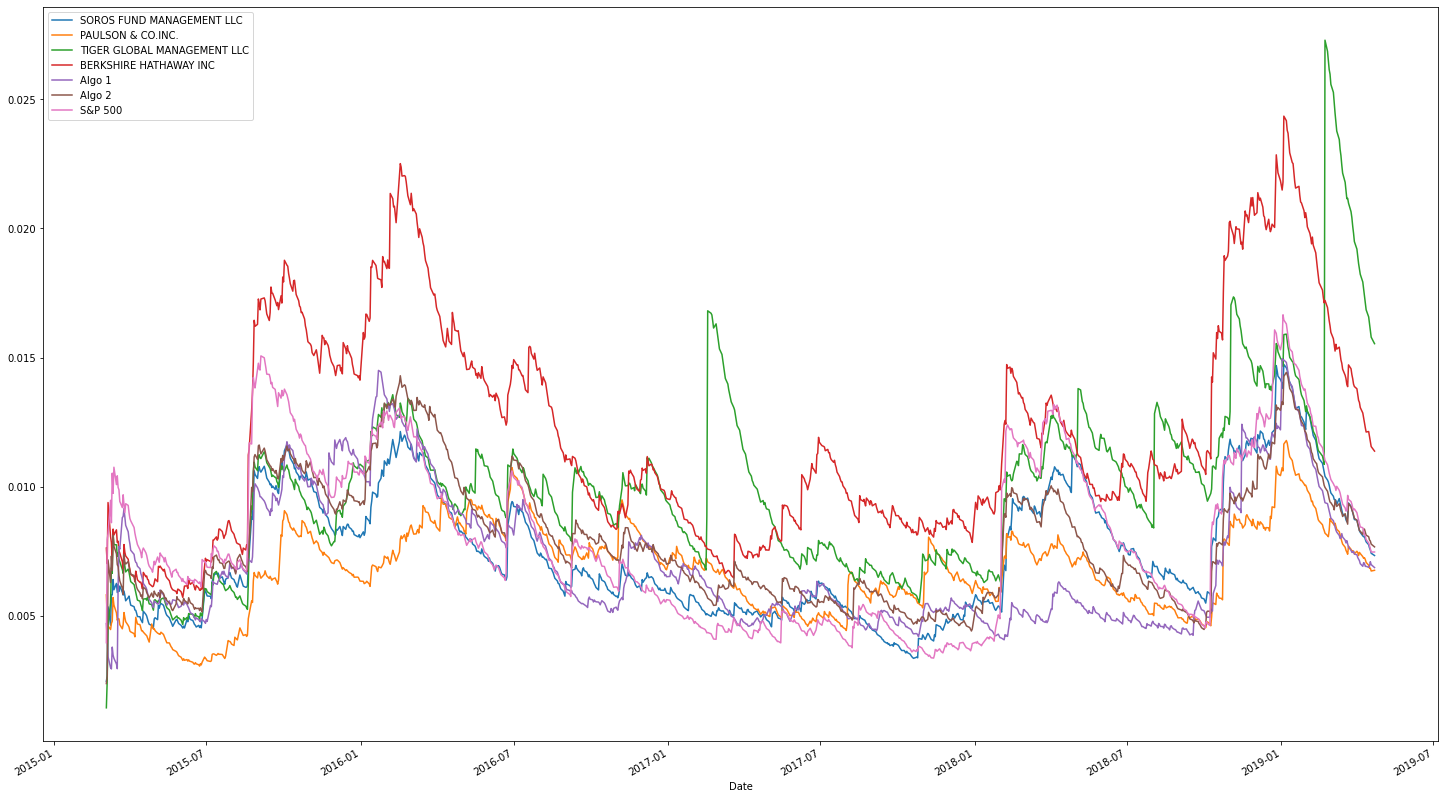

In [25]:
# Use `ewm` to calculate the rolling window
joined_portfolio_data.ewm(halflife=21).std().plot(figsize=(25,15))


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [26]:
# Annualized Sharpe Ratios
sharpe_ratio = ((joined_portfolio_data.mean() * 252) / (joined_portfolio_data.std() * np.sqrt(252)))
sharpe_ratio


SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
Algo 2                         0.484334
S&P 500                       -0.518582
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

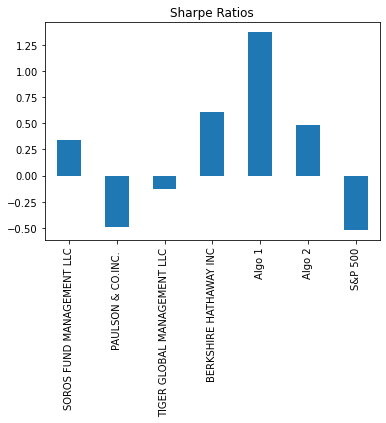

In [45]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio.plot(kind="bar", title="Sharpe Ratios")


### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Algorithmic 1 out-performs whale and S&P 500 portfolios

Algorithmic 2 only out-performs S&P 500

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [28]:
# Reading data from 1st stock
aapl_csv = Path("../Starter_Code/Resources/aapl_historical.csv")
aapl_csvdata = pd.read_csv(aapl_csv, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)

aapl_csvdata.sort_index(inplace=True)
aapl_csvdata.head()


,Symbol,NOCP
Trade DATE,,
2018-05-11,AAPL,188.59
2018-05-14,AAPL,188.15
2018-05-15,AAPL,186.44
2018-05-16,AAPL,188.18
2018-05-17,AAPL,186.99


In [29]:
# Reading data from 2nd stock
cost_csv = Path("../Starter_Code/Resources/cost_historical.csv")
cost_csvdata = pd.read_csv(cost_csv, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)

cost_csvdata.sort_index(inplace=True)
cost_csvdata.head()


,Symbol,NOCP
Trade DATE,,
2018-05-11,COST,195.76
2018-05-14,COST,195.88
2018-05-15,COST,195.48
2018-05-16,COST,198.71
2018-05-17,COST,199.60


In [30]:
# Reading data from 3rd stock
goog_csv = Path("../Starter_Code/Resources/goog_historical.csv")
goog_csvdata = pd.read_csv(goog_csv, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)

goog_csvdata.sort_index(inplace=True)
goog_csvdata.head()


,Symbol,NOCP
Trade DATE,,
2018-05-11,GOOG,1098.26
2018-05-14,GOOG,1100.20
2018-05-15,GOOG,1079.23
2018-05-16,GOOG,1081.77
2018-05-17,GOOG,1078.59


In [31]:
# Combine all stocks in a single DataFrame
custom_portfolio_data = pd.concat([aapl_csvdata, cost_csvdata, goog_csvdata], axis="rows", join="inner")


In [32]:
# Reset Date index
custom_portfolio_data = custom_portfolio_data.reset_index()


In [33]:
# Reorganize portfolio data by having a column per symbol
custom_portfolio_data = custom_portfolio_data.pivot_table(values="NOCP", index="Trade DATE", columns="Symbol")
custom_portfolio_data.sort_index(inplace=True)
custom_portfolio_data.head()


Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59


In [34]:
# Calculate daily returns
custom_portfolio_returns = custom_portfolio_data.pct_change()

# Drop NAs
custom_portfolio_returns = custom_portfolio_returns.dropna()

# Display sample data
custom_portfolio_returns.head()


Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-14,-0.002333,0.000613,0.001766
2018-05-15,-0.009088,-0.002042,-0.019060
2018-05-16,0.009333,0.016523,0.002354
2018-05-17,-0.006324,0.004479,-0.002940
2018-05-18,-0.003637,-0.003206,-0.011339


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [35]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
custom_returns = custom_portfolio_returns.dot(weights)

# Display sample data
custom_returns.head()


Trade DATE
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
2018-05-18   -0.006061
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [36]:
# Join your returns DataFrame to the original returns DataFrame
all_portfolio_returns_data = pd.concat([custom_returns, joined_portfolio_data], axis="columns", join="inner")
all_portfolio_returns_data.rename(columns= {0: "CUSTOM PORTFOLIO"},inplace = True)
all_portfolio_returns_data.sort_index()
all_portfolio_returns_data.head()


,CUSTOM PORTFOLIO,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
2018-05-14,0.000015,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.006889
2018-05-15,-0.010064,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.004044
2018-05-16,0.009403,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.000857
2018-05-17,-0.001595,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,0.002639
2018-05-18,-0.006061,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.007333


In [37]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
all_portfolio_returns_data = all_portfolio_returns_data.dropna()
all_portfolio_returns_data.count()


CUSTOM PORTFOLIO               236
SOROS FUND MANAGEMENT LLC      236
PAULSON & CO.INC.              236
TIGER GLOBAL MANAGEMENT LLC    236
BERKSHIRE HATHAWAY INC         236
Algo 1                         236
Algo 2                         236
S&P 500                        236
dtype: int64

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [38]:
# Calculate the annualized `std`
all_portfolio_std = all_portfolio_returns_data.std()
combined_annualized_std = all_portfolio_std * np.sqrt(252)
combined_annualized_std = combined_annualized_std.sort_values(ascending=False)
combined_annualized_std


BERKSHIRE HATHAWAY INC         0.247305
TIGER GLOBAL MANAGEMENT LLC    0.232898
CUSTOM PORTFOLIO               0.211627
S&P 500                        0.152469
SOROS FUND MANAGEMENT LLC      0.146812
Algo 2                         0.139499
Algo 1                         0.133927
PAULSON & CO.INC.              0.116928
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:title={'center':"21-Day Rolling Standard Deviation for All Portfolio's"}>

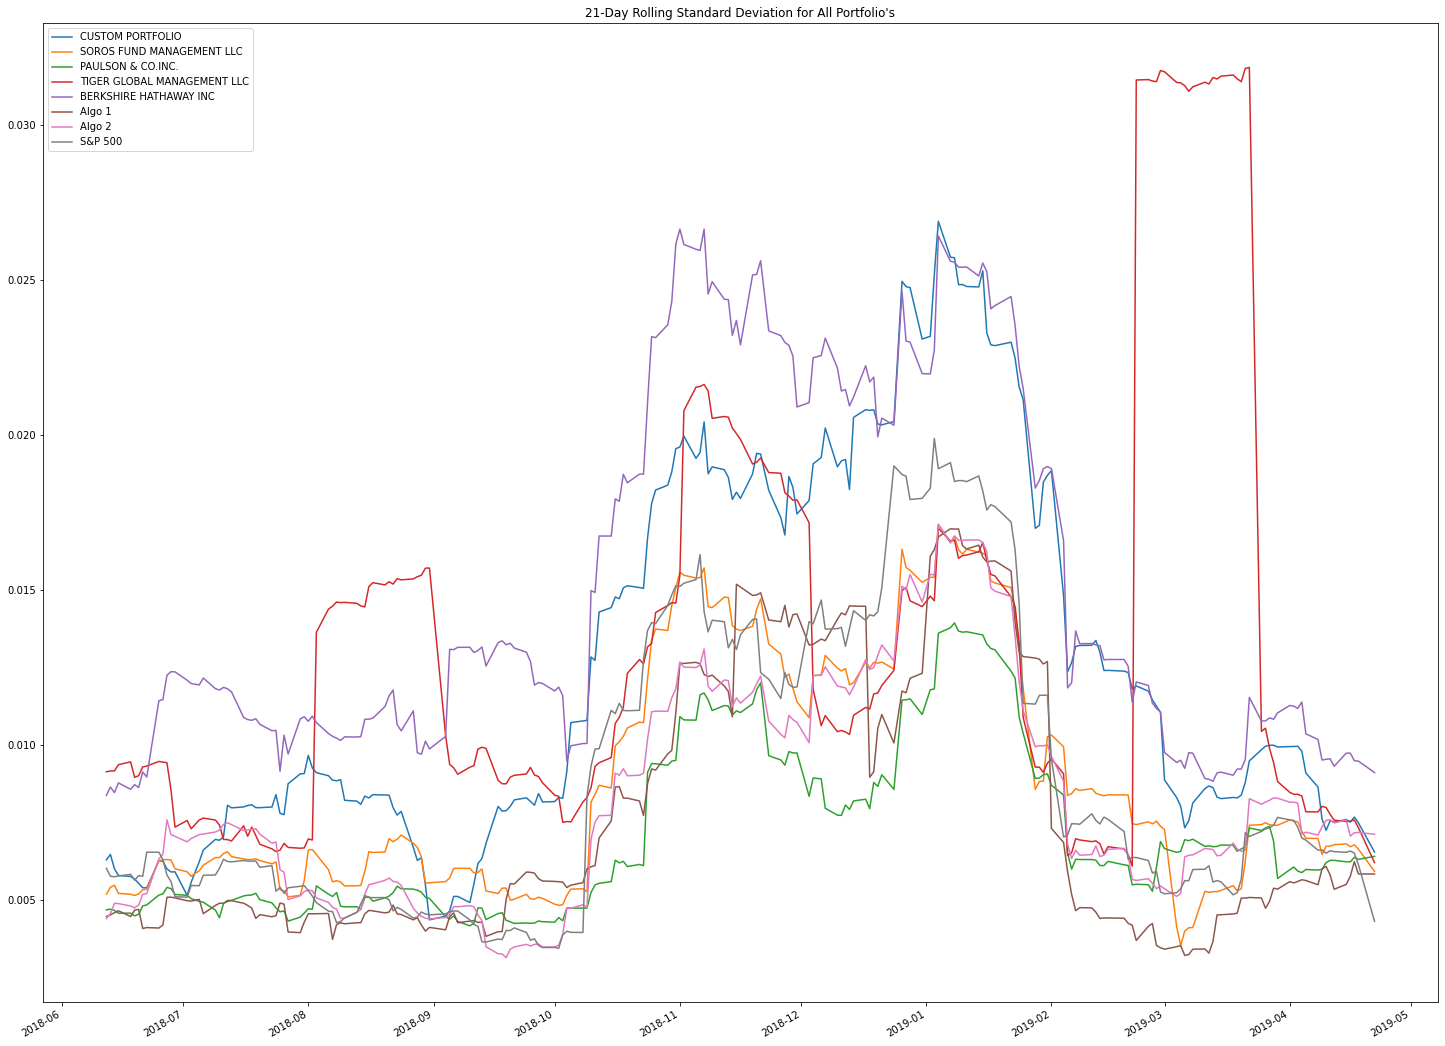

In [39]:
# Calculate rolling standard deviation
all_rolling_21 = all_portfolio_returns_data.rolling(window=21).std()

# Plot rolling standard deviation
all_rolling_21.plot(title="21-Day Rolling Standard Deviation for All Portfolio's", figsize=(25,20))


### Calculate and plot the correlation

In [40]:
# Calculate and plot the correlation
all_correlation = all_portfolio_returns_data.corr()
all_correlation


,CUSTOM PORTFOLIO,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
CUSTOM PORTFOLIO,1.000000,0.732548,0.643828,0.390961,0.800558,0.260331,0.739020,0.005603
SOROS FUND MANAGEMENT LLC,0.732548,1.000000,0.791802,0.477844,0.816197,0.336909,0.862583,-0.028256
PAULSON & CO.INC.,0.643828,0.791802,1.000000,0.484869,0.650390,0.360727,0.783865,-0.059862
TIGER GLOBAL MANAGEMENT LLC,0.390961,0.477844,0.484869,1.000000,0.324306,0.113671,0.408402,0.005881
BERKSHIRE HATHAWAY INC,0.800558,0.816197,0.650390,0.324306,1.000000,0.325985,0.782054,-0.038832
Algo 1,0.260331,0.336909,0.360727,0.113671,0.325985,1.000000,0.364457,-0.054478
Algo 2,0.739020,0.862583,0.783865,0.408402,0.782054,0.364457,1.000000,-0.042540
S&P 500,0.005603,-0.028256,-0.059862,0.005881,-0.038832,-0.054478,-0.042540,1.000000


<AxesSubplot:>

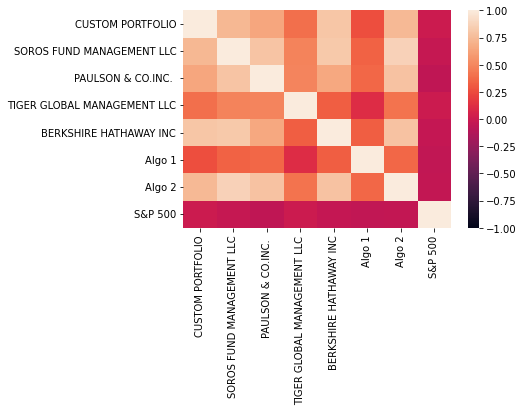

In [41]:
# Heatmap visualization
sns.heatmap(all_correlation, vmin=-1, vmax=1)


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

Custom Portfolio has a Beta of: 0.007777644779290121



<AxesSubplot:title={'center':'Rolling 60-Day Beta of Custom Portfolio'}>

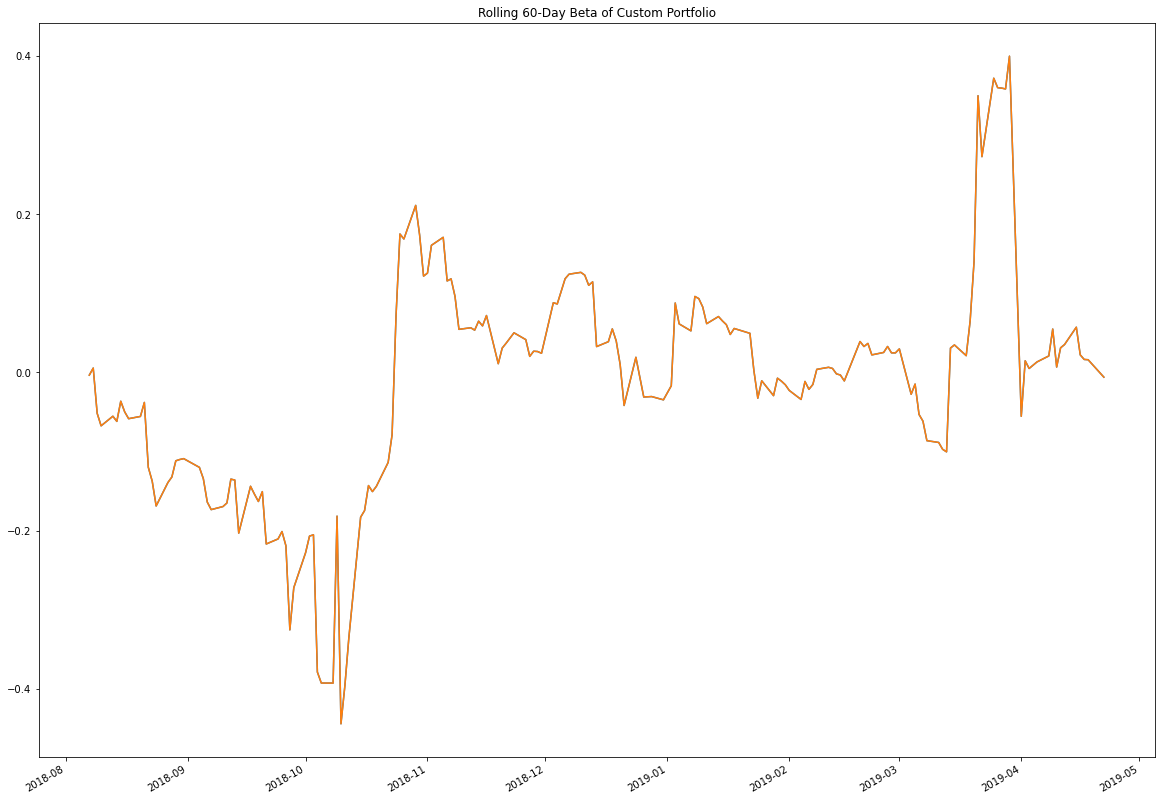

In [64]:
# Calculate and plot Beta
# Calculate covariance of a custom portfolio
cov_custom = all_portfolio_returns_data['CUSTOM PORTFOLIO'].cov(all_portfolio_returns_data['S&P 500'])

# Calculate variance of S&P 500
joined_var_sp500 = all_portfolio_returns_data['S&P 500'].var()

# Computing beta
custom_beta = cov_custom / joined_var_sp500
print(f"Custom Portfolio has a Beta of: {custom_beta}\n")

# Plot beta trend
rolling_cov_custom = all_portfolio_returns_data['CUSTOM PORTFOLIO'].rolling(window=60).cov(all_portfolio_returns_data['S&P 500'])
rolling_joined_var_sp500 = all_portfolio_returns_data['S&P 500'].rolling(window=60).var()
rolling_beta_custom = rolling_cov_custom / rolling_joined_var_sp500

ax = rolling_beta_custom.plot(title="Rolling 60-Day Beta of Custom Portfolio",figsize=(20,15))
rolling_beta_custom.plot(ax=ax)


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [48]:
# Calculate Annualized Sharpe Ratios
all_sharpe_ratio = ((all_portfolio_returns_data.mean() * 252) / (all_portfolio_returns_data.std() * np.sqrt(252)))
all_sharpe_ratio.sort_values(ascending=False)


Algo 1                         2.001260
CUSTOM PORTFOLIO               0.876152
SOROS FUND MANAGEMENT LLC      0.380007
PAULSON & CO.INC.              0.227577
BERKSHIRE HATHAWAY INC         0.103006
Algo 2                         0.007334
S&P 500                       -0.427676
TIGER GLOBAL MANAGEMENT LLC   -1.066635
dtype: float64

<AxesSubplot:title={'center':"Sharpe Ratios for All Portfolio's"}>

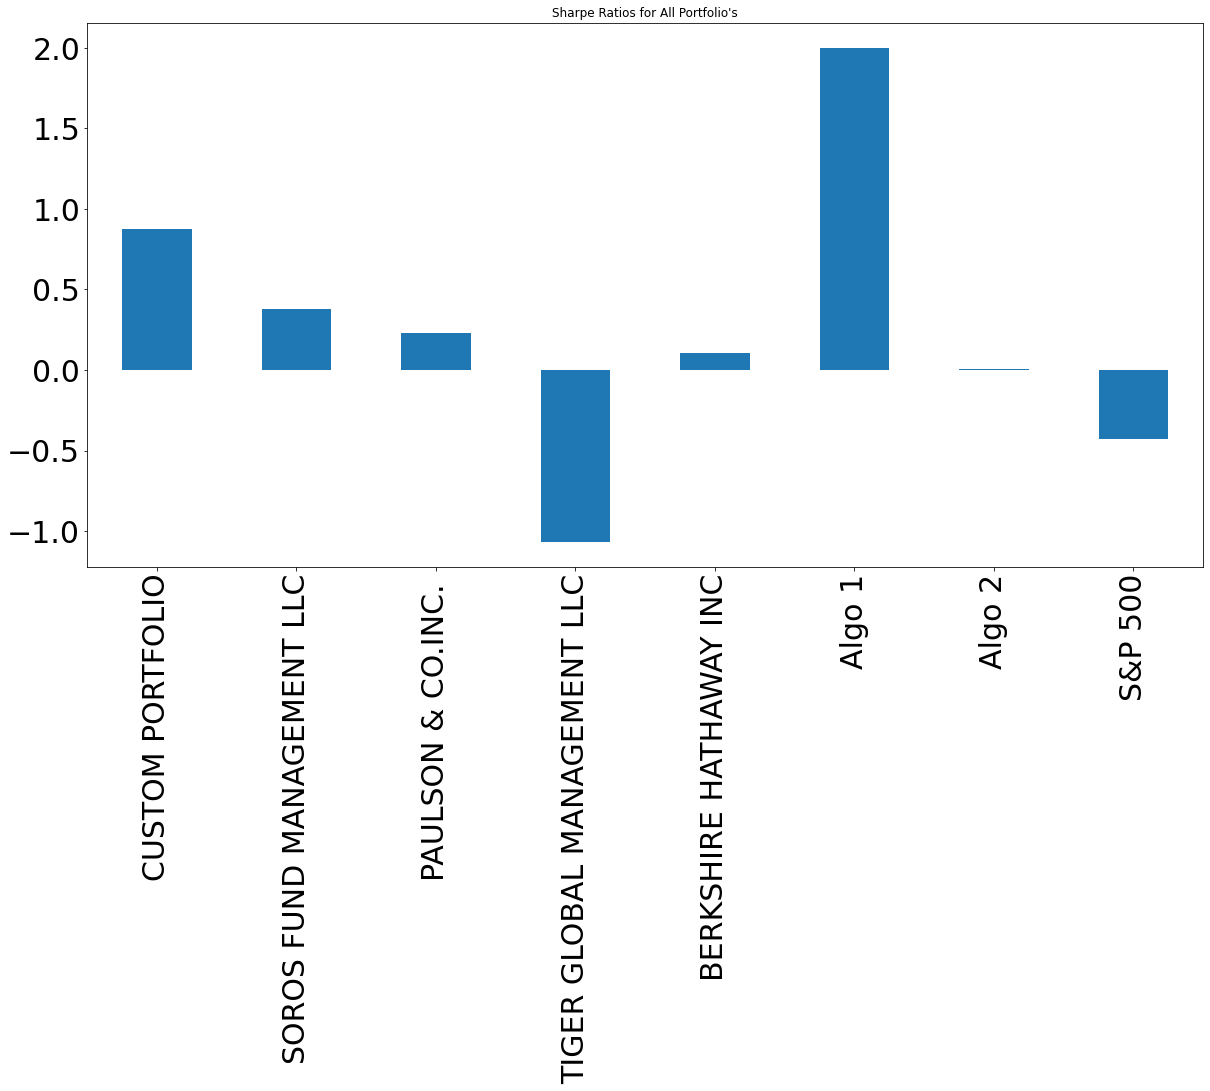

In [67]:
# Visualize the sharpe ratios as a bar plot
all_sharpe_ratio.plot(kind="bar", title="Sharpe Ratios for All Portfolio's", figsize=(20,10), fontsize=30)


### How does your portfolio do?

Custom portfolio did rather well compared to others: although Algorithmic 1 (Algo 1) has out performed compared to custom portfolio and all others. Only Algo 1 and Custom Portfolio managed to surpass a 60-rolling sharpe ratio of 0.5.